In [1]:
import os
import numpy as np
import pandas as pd

# getting data
from pydob.exploratory import get_dataset_type_df, savefig

# plotting 
import matplotlib.pyplot as plt

from pydob.settings import nt_style, nt_blue, nt_black

In [2]:
%matplotlib inline
plt.style.use(nt_style)

## 4.a Complaints 

**Notes:**
- a couple years ago, way 311 categories worked changed, leading to 63 -> 6S
- also, between 6M & 6S we should get all current 311 complaints
- one is for all (6M) and one is for a particular elevator (6S)
- 6S is more critical, means the one elevator in the building is out



- 63: Elevator-Danger Condition/Shaft Open/Unguarded
- 45: Illegal Conversion	
- 05: Permit – None (Building/PA/Demo etc.)	
- 73: Failure to Maintain


"https://www1.nyc.gov/assets/buildings/pdf/complaint_category.pdf",


In [3]:
year_category_table = get_dataset_type_df(type_col='complaint_category',
                                           index_col='complaint_number',
                                           year_col='date_entered_year',
                                           dataset_name='complaints')

In [6]:
year_2018_2019 = year_category_table.loc[2018:2019]

In [7]:
year_2018_2019=year_2018_2019.reset_index()\
                                       .sort_values(by = [
                                            'date_entered_year','complaint_number'], 
                                                    ascending  = False)\
                                       .set_index(['date_entered_year','complaint_category'])/1000

year_2018_2019_top5 = year_2018_2019.groupby(level='date_entered_year')\
                        .apply(lambda x: x.nlargest(5,columns = ['complaint_number']))\
                        .reset_index(level =0, drop = True)

In [8]:
year_2018_2019_top5

complaint_number
date_entered_year complaint_category                  
2018              45                            17.107
                  05                            14.370
                  6S                             9.674
                  4B                             5.367
                  6M                             5.111
2019              05                            15.917
                  45                            15.605
                  6S                            10.643
                  7G                             5.990
                  6M                             5.811

In [4]:
year_category_table=year_category_table.reset_index()\
                                       .sort_values(by = [
                                            'date_entered_year','complaint_number'], 
                                                    ascending  = False)\
                                       .set_index(['date_entered_year','complaint_category'])/1000

year_category_table_top3 = year_category_table.groupby(level='date_entered_year')\
                        .apply(lambda x: x.nlargest(3,columns = ['complaint_number']))\
                        .reset_index(level =0, drop = True)

to_plot = year_category_table_top3.loc[2006:2019].unstack()

to_plot.columns = to_plot.columns.droplevel()

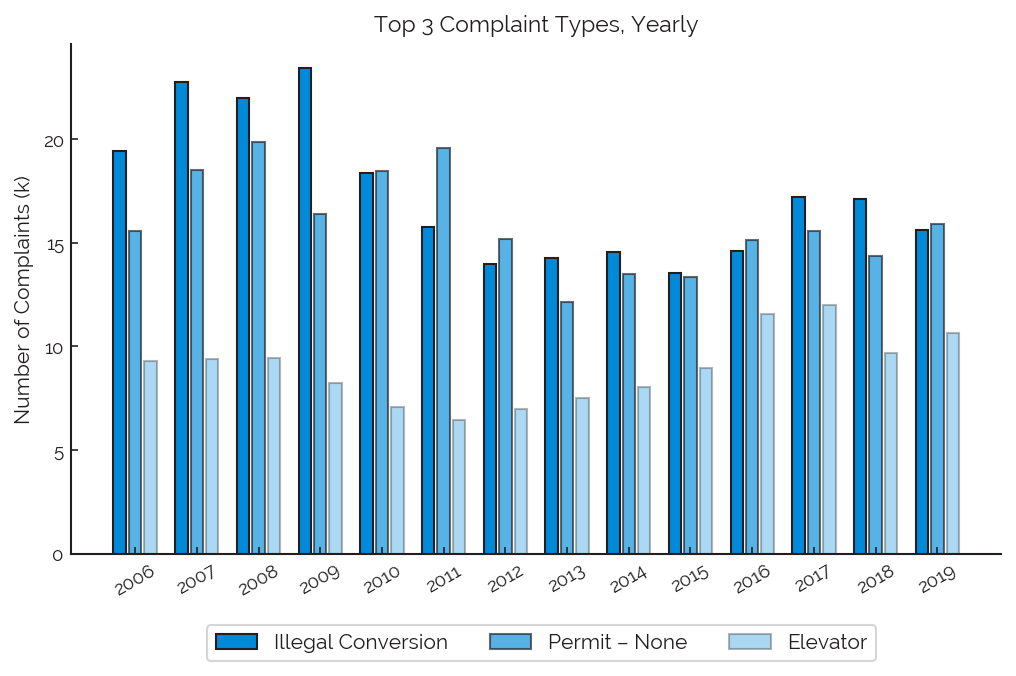

In [5]:
# setting legend labels
complaint_types=['Illegal Conversion','Permit – None','Elevator']

fig, ax = plt.subplots()

# x ticks labels
ix1 = to_plot.index.tolist()

# ticks
x1 = np.linspace(0,13,(2019-2006)+1)*4
x2 = np.linspace(0,13,(2019-2006)+1)*4+1
x3 = np.linspace(0,13,(2019-2006)+1)*4+2

# plotting
plt.bar(x1,to_plot['45'], width = 0.8, color=nt_blue,label = complaint_types[0],edgecolor = nt_black, )
plt.bar(x2,to_plot['05'], width = 0.8, color=nt_blue,alpha = 0.66, label = complaint_types[1],edgecolor = nt_black,)
plt.bar(x3,to_plot['63'], width = 0.8, color=nt_blue,alpha = 0.33, label = complaint_types[2],edgecolor = nt_black,)
plt.bar(x3,to_plot['6S'], width = 0.8, color=nt_blue,alpha = 0.33, edgecolor = nt_black,)

#label
plt.xticks(ticks=x2, labels=ix1,rotation=30)
lab = plt.ylabel("Number of Complaints (k)")
lab = plt.xlabel(None)

# Legend

l = plt.legend(loc='center left', 
           bbox_to_anchor=(.135, -0.175),
           fancybox=True,
           shadow=False, 
           ncol=3)
# title
t = plt.title("Top 3 Complaint Types, Yearly")

savefig("complaint_types.png", fig, bottom=.2)

In [7]:
to_plot

complaint_category,45,05,63,6S
date_entered_year,,,,
2006,19.424,15.571,9.281,NaN
2007,22.739,18.483,9.413,NaN
2008,21.966,19.855,9.431,NaN
2009,23.409,16.396,8.250,NaN
2010,18.370,18.454,7.082,NaN
2011,15.745,19.580,6.433,NaN
2012,13.977,15.190,7.002,NaN
2013,14.273,12.143,7.520,NaN
2014,14.568,13.508,8.034,NaN
